### Edgar Moises Hernandez-Gonzalez
#### 19/11/19-14/12/19
#### Clasificacion de coeficientes DWT de MI-EEG con CNN-1D + GRU
##### 10 ejecuciones independientes para obtener la media y desviacion estandar

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPool1D, Flatten, GRU, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA01E.csv", header=None)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [0]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [0]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 1, 3, 22))
x_test = x_test.reshape((n_samples_test, 1, 3, 22))

print(x_train.shape)
print(x_test.shape)

(288, 1, 3, 22)
(288, 1, 3, 22)


Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
288/288 [==============================] - 0s 80us/sample - loss: 2.1769 - acc: 0.4965
kappa:  0.3287037037037037
confusion matrix:
 [[38 22  4  8]
 [18 45  7  2]
 [16  1 25 30]
 [13  3 21 35]]
(0.49653119958138925, 0.4965277777777778, 0.4943086094767328, None)


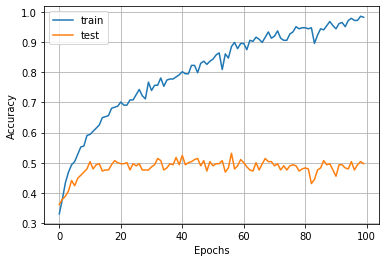

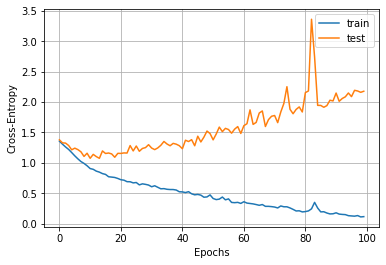

Iteration: 2
288/288 [==============================] - 0s 74us/sample - loss: 1.8931 - acc: 0.5174
kappa:  0.3564814814814815
confusion matrix:
 [[43 16  3 10]
 [24 40  5  3]
 [16  0 27 29]
 [12  2 19 39]]
(0.5309420582106608, 0.517361111111111, 0.5171825063512276, None)


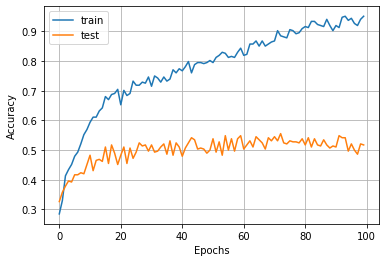

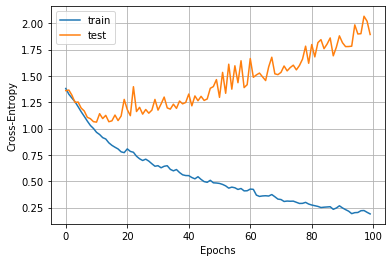

Iteration: 3
288/288 [==============================] - 0s 67us/sample - loss: 2.5395 - acc: 0.5035
kappa:  0.3379629629629629
confusion matrix:
 [[37 23  6  6]
 [18 46  6  2]
 [19  2 30 21]
 [13  5 22 32]]
(0.5059726695377506, 0.5034722222222222, 0.5023524761900251, None)


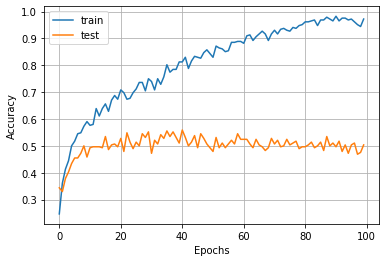

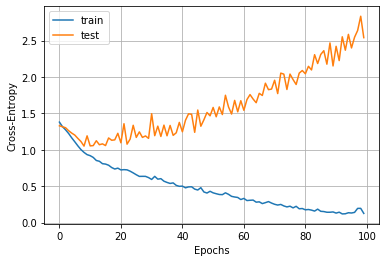

Iteration: 4
288/288 [==============================] - 0s 90us/sample - loss: 2.1711 - acc: 0.5139
kappa:  0.35185185185185186
confusion matrix:
 [[31 27 10  4]
 [ 7 56  9  0]
 [14  3 37 18]
 [11  5 32 24]]
(0.5124104458343589, 0.513888888888889, 0.5039138711733465, None)


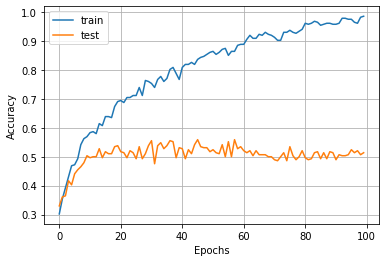

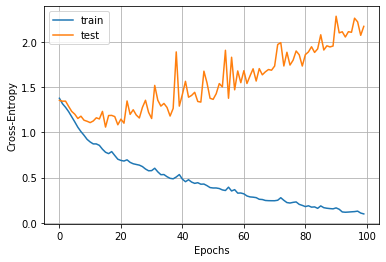

Iteration: 5
288/288 [==============================] - 0s 84us/sample - loss: 2.0148 - acc: 0.5312
kappa:  0.375
confusion matrix:
 [[33 26  7  6]
 [16 46  8  2]
 [ 9  1 37 25]
 [11  1 23 37]]
(0.5304468132729002, 0.53125, 0.5306875534479867, None)


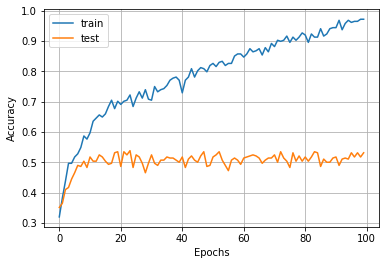

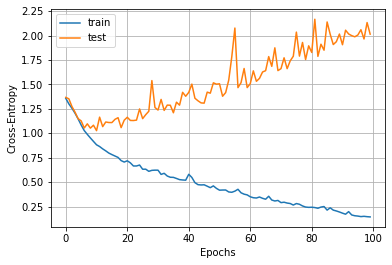

Iteration: 6
288/288 [==============================] - 0s 78us/sample - loss: 2.3671 - acc: 0.4965
kappa:  0.3287037037037037
confusion matrix:
 [[49 12  5  6]
 [28 34  6  4]
 [15  2 22 33]
 [11  4 19 38]]
(0.5054467586830047, 0.4965277777777778, 0.489989458148851, None)


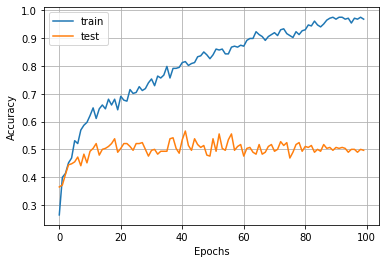

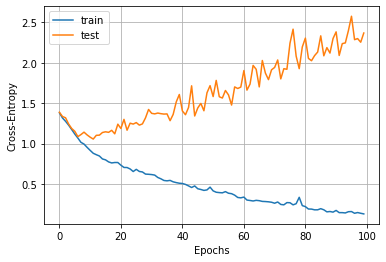

Iteration: 7
288/288 [==============================] - 0s 76us/sample - loss: 1.9737 - acc: 0.5000
kappa:  0.33333333333333337
confusion matrix:
 [[40 18  8  6]
 [22 38 10  2]
 [15  0 34 23]
 [13  2 25 32]]
(0.5122779519331243, 0.5, 0.502223114527365, None)


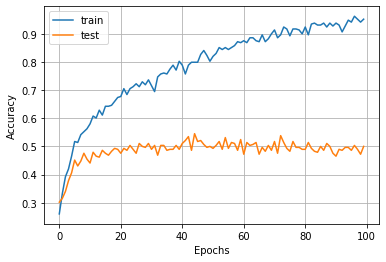

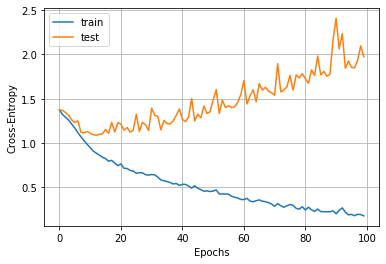

Iteration: 8
288/288 [==============================] - 0s 72us/sample - loss: 2.1963 - acc: 0.5000
kappa:  0.33333333333333337
confusion matrix:
 [[48 12  5  7]
 [30 34  5  3]
 [14  1 24 33]
 [11  3 20 38]]
(0.5148999160973271, 0.5, 0.495908221211982, None)


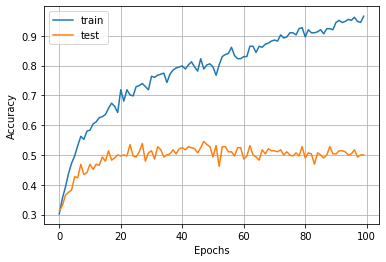

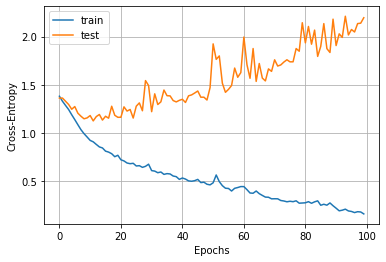

Iteration: 9
288/288 [==============================] - 0s 71us/sample - loss: 2.3406 - acc: 0.5174
kappa:  0.3564814814814815
confusion matrix:
 [[42 18  7  5]
 [18 42  9  3]
 [12  0 28 32]
 [12  3 20 37]]
(0.5211715367965367, 0.5173611111111112, 0.5172731904670317, None)


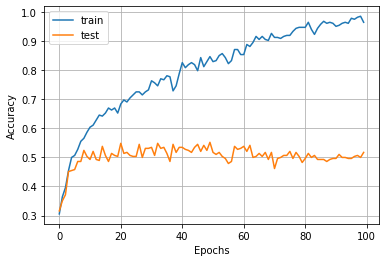

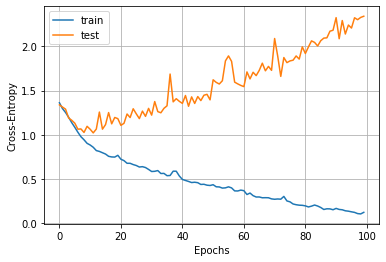

Iteration: 10
288/288 [==============================] - 0s 76us/sample - loss: 1.9949 - acc: 0.5000
kappa:  0.33333333333333337
confusion matrix:
 [[33 27  5  7]
 [11 53  7  1]
 [16  4 21 31]
 [12  3 20 37]]
(0.4876493139974204, 0.5, 0.49025, None)


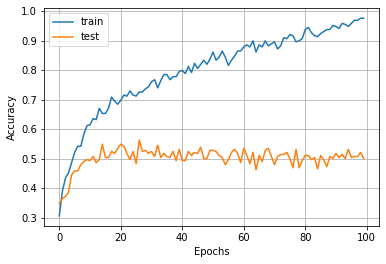

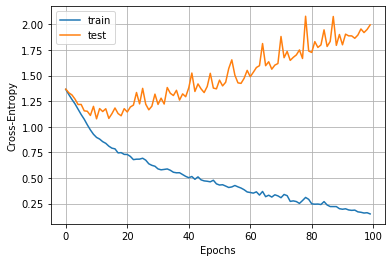


Resultados:
loss: [2.1768650081422596, 1.8930936124589708, 2.5394847525490656, 2.1711107624901667, 2.0147979656855264, 2.36705043580797, 1.9736987219916449, 2.1962535513771906, 2.340631047884623, 1.9949046240912542]
accuracy: [0.4965278, 0.5173611, 0.5034722, 0.5138889, 0.53125, 0.4965278, 0.5, 0.5, 0.5173611, 0.5]
kappa: [0.3287037037037037, 0.3564814814814815, 0.3379629629629629, 0.35185185185185186, 0.375, 0.3287037037037037, 0.33333333333333337, 0.33333333333333337, 0.3564814814814815, 0.33333333333333337]
precision: [0.49653119958138925, 0.5309420582106608, 0.5059726695377506, 0.5124104458343589, 0.5304468132729002, 0.5054467586830047, 0.5122779519331243, 0.5148999160973271, 0.5211715367965367, 0.4876493139974204]
recall: [0.4965277777777778, 0.517361111111111, 0.5034722222222222, 0.513888888888889, 0.53125, 0.4965277777777778, 0.5, 0.5, 0.5173611111111112, 0.5]
f1: [0.4943086094767328, 0.5171825063512276, 0.5023524761900251, 0.5039138711733465, 0.5306875534479867, 0.489989458148

In [0]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(10):
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(TimeDistributed(Conv1D(32, 3, activation='relu'), input_shape=(None,3,22)))
    model.add(TimeDistributed(Flatten()))
    model.add(GRU(128))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_18 (TimeDis (None, None, 1, 32)       2144      
_________________________________________________________________
time_distributed_19 (TimeDis (None, None, 32)          0         
_________________________________________________________________
gru_9 (GRU)                  (None, 128)               61824     
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 516       
Total params: 64,484
Trainable params: 64,484
Non-trainable params: 0
_________________________________________________________________


In [0]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.5076
std: (+/- 0.0111)
kappa: 0.3435
precision: 0.5118
recall: 0.5076
f1: 0.5044
